# Analyzing the Effectiveness of Mandatory Vaccination Policy on COVID-19 Case Reduction in Pakistan


This notebook presents an analysis of COVID-19 policies in Pakistan, with a focus on evaluating the impact of the mandatory vaccination policy on the reduction of COVID-19 cases.


# Setup

In [106]:
# Clone the data repository from GitHub
!git clone https://github.com/smk75/PakistanCovidData.git

# Change the current working directory to the cloned repository's directory
%cd PakistanCovidData/


Cloning into 'PakistanCovidData'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 416.59 KiB | 1.94 MiB/s, done.
/content/PakistanCovidData/PakistanCovidData/PakistanCovidData/PakistanCovidData/PakistanCovidData/PakistanCovidData/PakistanCovidData


In [107]:
!pip install pmdarima

In [108]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

**Load the Data**

In [109]:
# Load the dataset
data = pd.read_csv('main_data.csv')

# Convert the 'Date' column to datetime format for easier analysis
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')


**Data Overview**

In [110]:
# Preliminary data exploration
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   CountryName                                                                      1096 non-null   object        
 1   CountryCode                                                                      1096 non-null   object        
 2   RegionName                                                                       0 non-null      float64       
 3   RegionCode                                                                       0 non-null      float64       
 4   Jurisdiction                                                                     1096 non-null   object        
 5   Date                                                                 

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,1096,1096.000000,723.000000,1096.000000,747.000000,1096.000000,727.000000,1096.000000,...,698.000000,1096.000000,488.000000,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,NaN,NaN,2021-07-01 12:00:00,1.565693,0.697095,1.468978,0.669344,1.194343,0.321871,2.291971,...,1.826648,2.990876,0.405738,8.873856e+05,18435.510036,18.907965,52.255338,56.138568,55.165164,62.956204
min,NaN,NaN,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2020-09-30 18:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.132748e+05,6495.250000,0.000000,41.420000,53.020000,50.090000,75.000000
50%,NaN,NaN,2021-07-01 12:00:00,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,...,2.000000,4.000000,0.000000,9.603850e+05,22362.000000,1.320000,50.460000,58.850000,56.865000,75.000000
75%,NaN,NaN,2022-04-01 06:00:00,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.525252e+06,30360.250000,49.090000,64.350000,65.230000,64.860000,75.000000
max,NaN,NaN,2022-12-31 00:00:00,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.575772e+06,30636.000000,55.710000,96.300000,74.640000,74.580000,75.000000
std,NaN,NaN,NaN,1.191779,0.459832,1.138350,0.470765,0.911422,0.467515,1.731937,...,0.378823,2.291917,0.491538,5.829396e+05,11773.798454,23.274188,18.124045,14.695693,14.443097,23.718707


In [111]:
# Data cleaning
data.dropna(inplace=True)  # Remove any missing values


# Analysis

##Exploratory Data Analysis (EDA)



### Confirmed Cases Over Time Graph


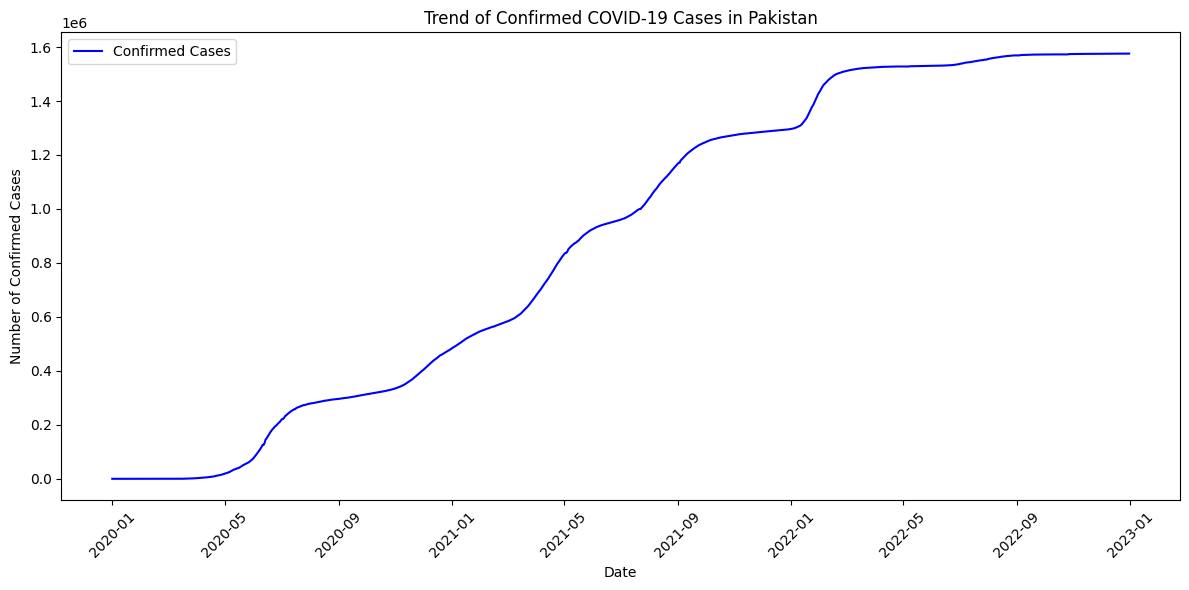

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('main_data.csv')

# Convert the 'Date' column to datetime format for easier analysis
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Plotting the trend of confirmed COVID-19 cases over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['ConfirmedCases'], label='Confirmed Cases', color='blue')
plt.title('Trend of Confirmed COVID-19 Cases in Pakistan')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()  # Add a legend to the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Display the plot


## Pakistan Government Policy Impact Analysis

### Containment and Closure Policy Intensities Over Time

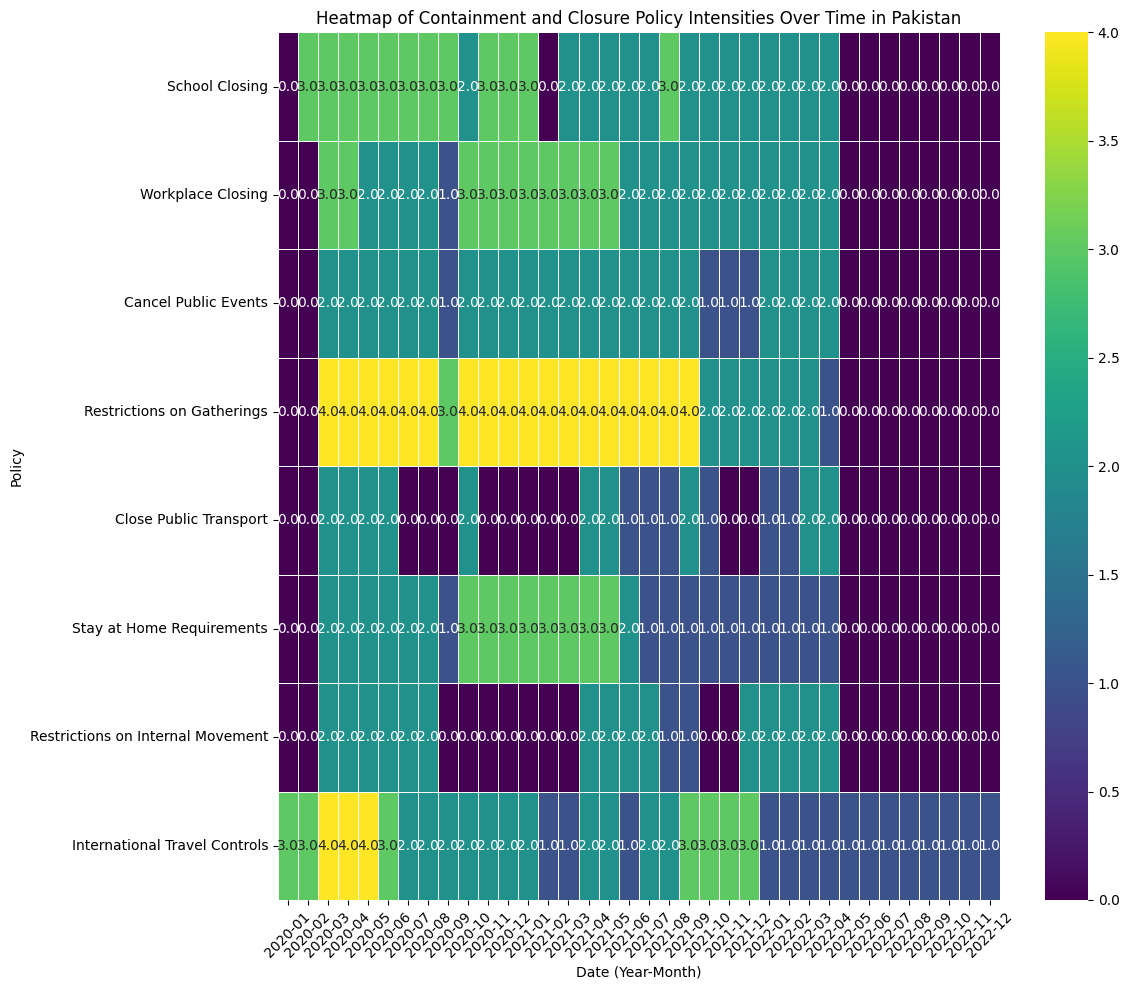

In [113]:


data['YearMonth'] = data['Date'].dt.to_period('M')

# Aggregating policy levels by maximum level enacted each month
# Assuming each row represents a day, and policies can vary within the month
monthly_policies = data.groupby('YearMonth').agg({
    'C1M_School closing': 'max',
    'C2M_Workplace closing': 'max',
    'C3M_Cancel public events': 'max',
    'C4M_Restrictions on gatherings': 'max',
    'C5M_Close public transport': 'max',
    'C6M_Stay at home requirements': 'max',
    'C7M_Restrictions on internal movement': 'max',
    'C8EV_International travel controls': 'max',
}).reset_index()

# Renaming the policies for better understanding
policy_names = {
    'C1M_School closing': 'School Closing',
    'C2M_Workplace closing': 'Workplace Closing',
    'C3M_Cancel public events': 'Cancel Public Events',
    'C4M_Restrictions on gatherings': 'Restrictions on Gatherings',
    'C5M_Close public transport': 'Close Public Transport',
    'C6M_Stay at home requirements': 'Stay at Home Requirements',
    'C7M_Restrictions on internal movement': 'Restrictions on Internal Movement',
    'C8EV_International travel controls': 'International Travel Controls',
}

monthly_policies.rename(columns=policy_names, inplace=True)

# Converting YearMonth back to string for plotting
monthly_policies['YearMonth'] = monthly_policies['YearMonth'].astype(str)

# Setting the YearMonth as index
monthly_policies.set_index('YearMonth', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(monthly_policies.T, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

plt.title('Heatmap of Containment and Closure Policy Intensities Over Time in Pakistan')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Policy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Economic Policy Intensities Over Time

<ipython-input-114-19af6530028c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_economic['Date'] = pd.to_datetime(data_economic['Date'], format='%Y%m%d')
<ipython-input-114-19af6530028c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_economic['YearMonth'] = data_economic['Date'].dt.to_period('M')


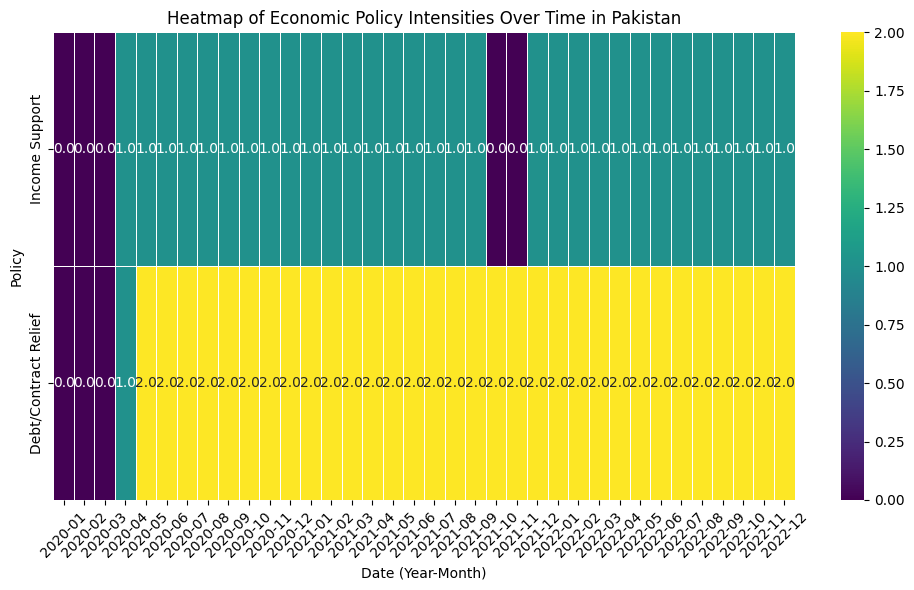

In [114]:
economic_policy_columns = {
    'E1_Income support': 'Income Support',
    'E2_Debt/contract relief': 'Debt/Contract Relief',
    # 'E3_Fiscal measures' and 'E4_International support' might require preprocessing due to their monetary nature
}

# Filter the DataFrame for the relevant columns (including Date for grouping)
data_economic = data[['Date'] + list(economic_policy_columns.keys())]

# Convert the 'Date' column to datetime format for easier manipulation
data_economic['Date'] = pd.to_datetime(data_economic['Date'], format='%Y%m%d')

# Extract year and month from the 'Date' column for grouping
data_economic['YearMonth'] = data_economic['Date'].dt.to_period('M')

# Aggregating economic policy levels by maximum level enacted each month
economic_policies = data_economic.groupby('YearMonth').agg({
    'E1_Income support': 'max',  # Placeholder for Income support
    'E2_Debt/contract relief': 'max',  # Placeholder for Debt/contract relief
}).reset_index()

# Renaming the policies for better understanding
economic_policies.rename(columns=economic_policy_columns, inplace=True)

# Converting YearMonth back to string for plotting
economic_policies['YearMonth'] = economic_policies['YearMonth'].astype(str)

# Setting the YearMonth as index
economic_policies.set_index('YearMonth', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(economic_policies.T, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

plt.title('Heatmap of Economic Policy Intensities Over Time in Pakistan')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Policy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Health System Policy Intensities Over Time

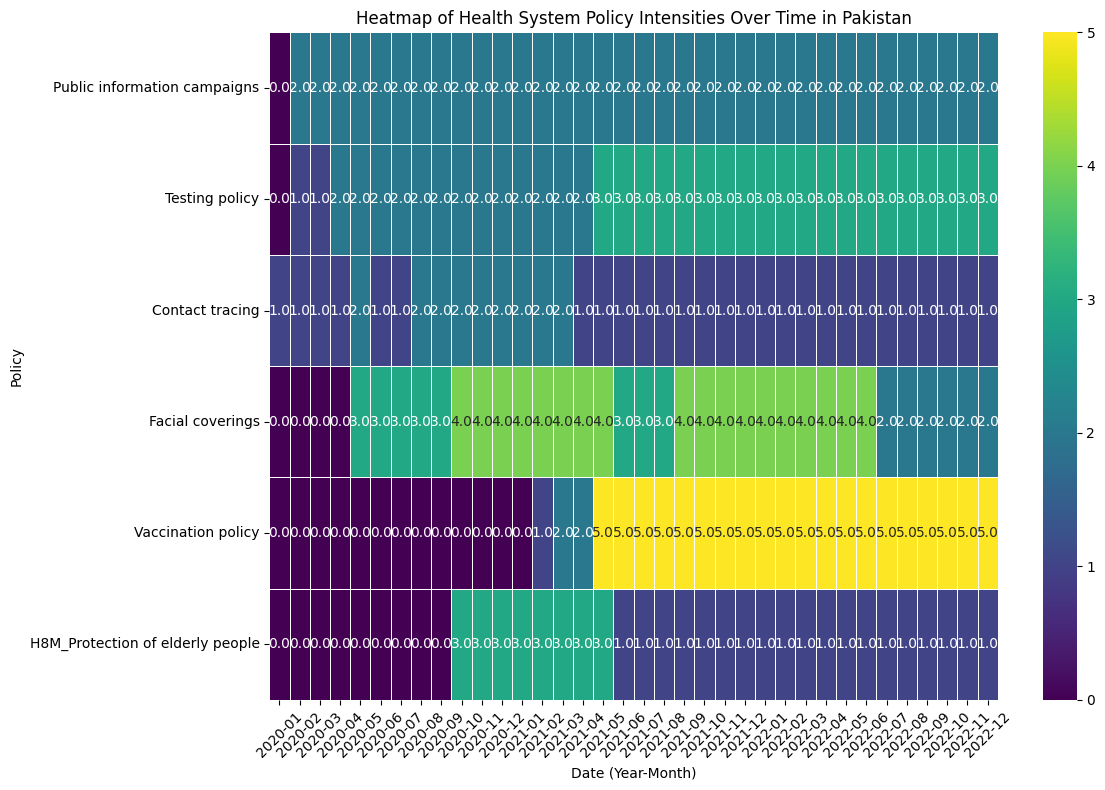

In [115]:
# Extract year and month from the 'Date' column for grouping
data['YearMonth'] = data['Date'].dt.to_period('M')

health_policy_columns = {
    'H1_Public information campaigns': 'max',
    'H2_Testing policy': 'max',
    'H3_Contact tracing': 'max',
    'H6M_Facial Coverings': 'max',
    'H7_Vaccination policy': 'max',
    'H8M_Protection of elderly people': 'max',
}

# Aggregating health system policy levels by maximum level enacted each month
health_policies = data.groupby('YearMonth').agg(health_policy_columns).reset_index()

# Renaming columns for better understanding
health_policy_names = {
    'H1_Public information campaigns': 'Public information campaigns',
    'H2_Testing policy': 'Testing policy',
    'H3_Contact tracing': 'Contact tracing',
    'H6M_Facial Coverings': 'Facial coverings',
    'H7_Vaccination policy': 'Vaccination policy',
    'H8M_combined_numeric': 'Protection of elderly people',
}

health_policies.rename(columns=health_policy_names, inplace=True)

# Converting YearMonth to string for plotting
health_policies['YearMonth'] = health_policies['YearMonth'].astype(str)

# Setting YearMonth as index
health_policies.set_index('YearMonth', inplace=True)

# Plotting the heatmap for Health System Policies
plt.figure(figsize=(12, 8))
sns.heatmap(health_policies.T, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

plt.title('Heatmap of Health System Policy Intensities Over Time in Pakistan')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Policy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Vaccination Policy Intensities Over Time in Pakistan

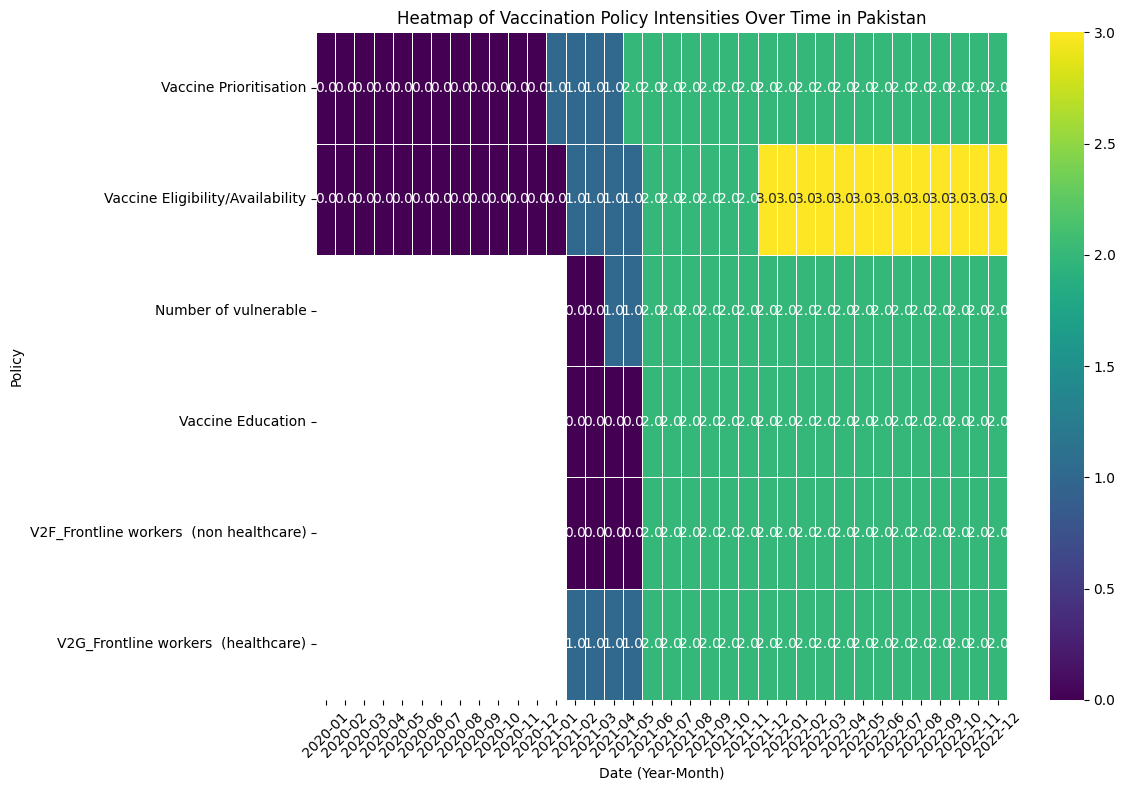

In [116]:
# Extract year and month from the 'Date' column for grouping
data['YearMonth'] = data['Date'].dt.to_period('M')

# Aggregate the vaccination policy levels by maximum level enacted each month
# Replace 'V1..summary.', 'V2..summary.', etc., with the actual column names from your dataset
vaccination_policies = data.groupby('YearMonth').agg({
    'V1_Vaccine Prioritisation (summary)': 'max',
    'V2A_Vaccine Availability (summary)': 'max',
    'V2D_Medically/ clinically vulnerable (Non-elderly)': 'max',
    'V2E_Education': 'max',
    'V2F_Frontline workers  (non healthcare)': 'max',
    'V2G_Frontline workers  (healthcare)': 'max',
}).reset_index()

# Renaming the policies for better understanding
vaccination_policy_names = {
    'V1_Vaccine Prioritisation (summary)': 'Vaccine Prioritisation',
    'V2A_Vaccine Availability (summary)': 'Vaccine Eligibility/Availability',
    'V2D_Medically/ clinically vulnerable (Non-elderly)': 'Number of vulnerable',
    'V2E_Education': 'Vaccine Education',
    'V2F_Frontline workers (non-healthcare)': 'Non-healthcare frontline workers',
    'V2G_Frontline workers (healthcare)': 'healthcare frontline workers',
}

vaccination_policies.rename(columns=vaccination_policy_names, inplace=True)

# Converting YearMonth to string for plotting
vaccination_policies['YearMonth'] = vaccination_policies['YearMonth'].astype(str)

# Setting YearMonth as index
vaccination_policies.set_index('YearMonth', inplace=True)

# Plotting the heatmap for Vaccination Policies
plt.figure(figsize=(12, 8))
sns.heatmap(vaccination_policies.T, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

plt.title('Heatmap of Vaccination Policy Intensities Over Time in Pakistan')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Policy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [117]:
# Sort by date to ensure chronological order
data.sort_values('Date', inplace=True)

# Keep only the relevant columns
data = data[['Date', 'V2B_Vaccine age eligibility/availability age floor (general population summary)', 'V2C_Vaccine age eligibility/availability age floor (at risk summary)']]

# Initialize columns to track changes
data['V2B_Changed'] = data['V2B_Vaccine age eligibility/availability age floor (general population summary)'].ne(data['V2B_Vaccine age eligibility/availability age floor (general population summary)'].shift())
data['V2C_Changed'] = data['V2C_Vaccine age eligibility/availability age floor (at risk summary)'].ne(data['V2C_Vaccine age eligibility/availability age floor (at risk summary)'].shift())

# Filter rows where either variable changes
changes = data[data['V2B_Changed'] | data['V2C_Changed']]

# Drop the change tracking columns as they are no longer needed for output
changes = changes.drop(columns=['V2B_Changed', 'V2C_Changed'])

# Extract month and year for each change
changes['Month'] = changes['Date'].dt.month_name()
changes['Year'] = changes['Date'].dt.year

# Select relevant columns for the output
changes = changes[['Month', 'Year', 'V2B_Vaccine age eligibility/availability age floor (general population summary)', 'V2C_Vaccine age eligibility/availability age floor (at risk summary)']]

# Print the changes directly to the terminal
print("Changes in vaccine age eligibility:")
print(changes.to_string(index=False))


Changes in vaccine age eligibility:
    Month  Year V2B_Vaccine age eligibility/availability age floor (general population summary) V2C_Vaccine age eligibility/availability age floor (at risk summary)
  January  2020                                                                             NaN                                                                  NaN
  January  2020                                                                             NaN                                                                  NaN
  January  2020                                                                             NaN                                                                  NaN
  January  2020                                                                             NaN                                                                  NaN
  January  2020                                                                             NaN                                            

<ipython-input-117-983dd9a25e59>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['V2B_Changed'] = data['V2B_Vaccine age eligibility/availability age floor (general population summary)'].ne(data['V2B_Vaccine age eligibility/availability age floor (general population summary)'].shift())
<ipython-input-117-983dd9a25e59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['V2C_Changed'] = data['V2C_Vaccine age eligibility/availability age floor (at risk summary)'].ne(data['V2C_Vaccine age eligibility/av

## Pakistan Provinces Analysis

### Province Data Setup

In [118]:
# Load the dataset
file_path = 'combined_daily_reports.xlsx'
province_data = pd.read_excel(file_path)

In [119]:
# Convert 'Report Date' to datetime format and sort province_data by it
province_data['Report Date'] = pd.to_datetime(province_data['Report Date'])
province_data.sort_values('Report Date', inplace=True)

In [120]:
# Preliminary data exploration
province_data.head()
province_data.info()
province_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6069 entries, 0 to 6068
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Province_State       6069 non-null   object        
 1   Country_Region       6069 non-null   object        
 2   Last_Update          6069 non-null   object        
 3   Lat                  6069 non-null   float64       
 4   Long_                6069 non-null   float64       
 5   Confirmed            6069 non-null   int64         
 6   Deaths               6069 non-null   int64         
 7   Recovered            2947 non-null   float64       
 8   Active               2947 non-null   object        
 9   Combined_Key         6069 non-null   object        
 10  Incidence_Rate       1064 non-null   float64       
 11  Case-Fatality_Ratio  1064 non-null   float64       
 12  Report Date          6069 non-null   datetime64[ns]
 13  Incident_Rate        5005 non-null   f

,Lat,Long_,Confirmed,Deaths,Recovered,Incidence_Rate,Case-Fatality_Ratio,Report Date,Incident_Rate,Case_Fatality_Ratio
count,6069.000000,6069.000000,6069.000000,6069.00000,2947.000000,1064.000000,1064.000000,6069,5005.000000,5003.000000
mean,31.874179,71.565235,142204.980886,2977.71445,69822.325755,234.728729,2.055006,2021-08-17 00:00:00,1227.073474,1.903896
min,26.009446,65.898403,444.000000,9.00000,217.000000,10.975521,0.881809,2020-06-10 00:00:00,2.077032,0.739466
25%,28.328492,68.776807,17771.000000,218.00000,8478.500000,88.142495,1.136345,2021-01-12 00:00:00,315.734288,1.084372
50%,33.665087,72.139132,44690.000000,806.00000,26208.000000,122.322986,2.186685,2021-08-17 00:00:00,593.063591,1.781461
75%,34.485332,73.947253,202743.000000,5237.00000,97909.000000,283.083481,2.454605,2022-03-22 00:00:00,1095.574541,2.766950
max,35.792146,74.982138,594417.000000,13614.00000,339379.000000,1089.470002,4.199078,2022-10-24 00:00:00,6948.417500,3.271224
std,3.340697,2.934404,172350.794394,3909.63050,87794.751969,241.121290,0.804669,NaN,1699.106284,0.785364


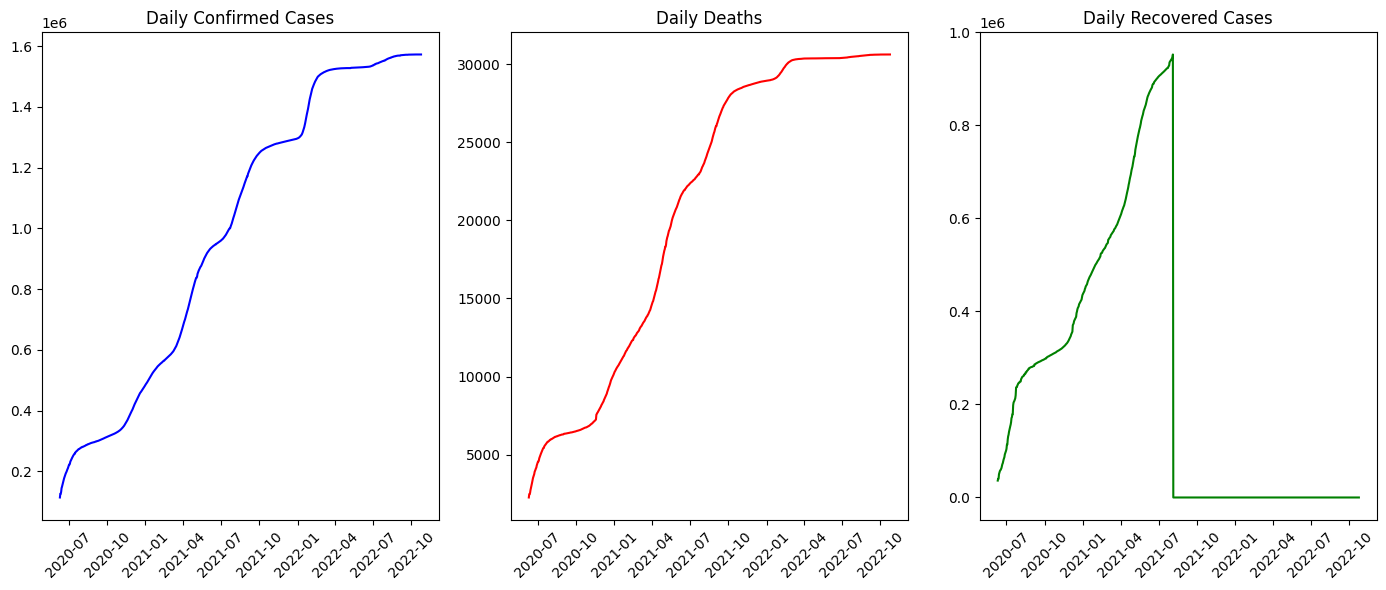

In [121]:
# Aggregate province_data by 'Report Date' for overall trend analysis
daily_totals = province_data.groupby('Report Date').sum()

# Plotting daily trends for confirmed cases, deaths, and recoveries
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(daily_totals.index, daily_totals['Confirmed'], label='Confirmed', color='blue')
plt.title('Daily Confirmed Cases')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.plot(daily_totals.index, daily_totals['Deaths'], label='Deaths', color='red')
plt.title('Daily Deaths')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.plot(daily_totals.index, daily_totals['Recovered'], label='Recovered', color='green')
plt.title('Daily Recovered Cases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

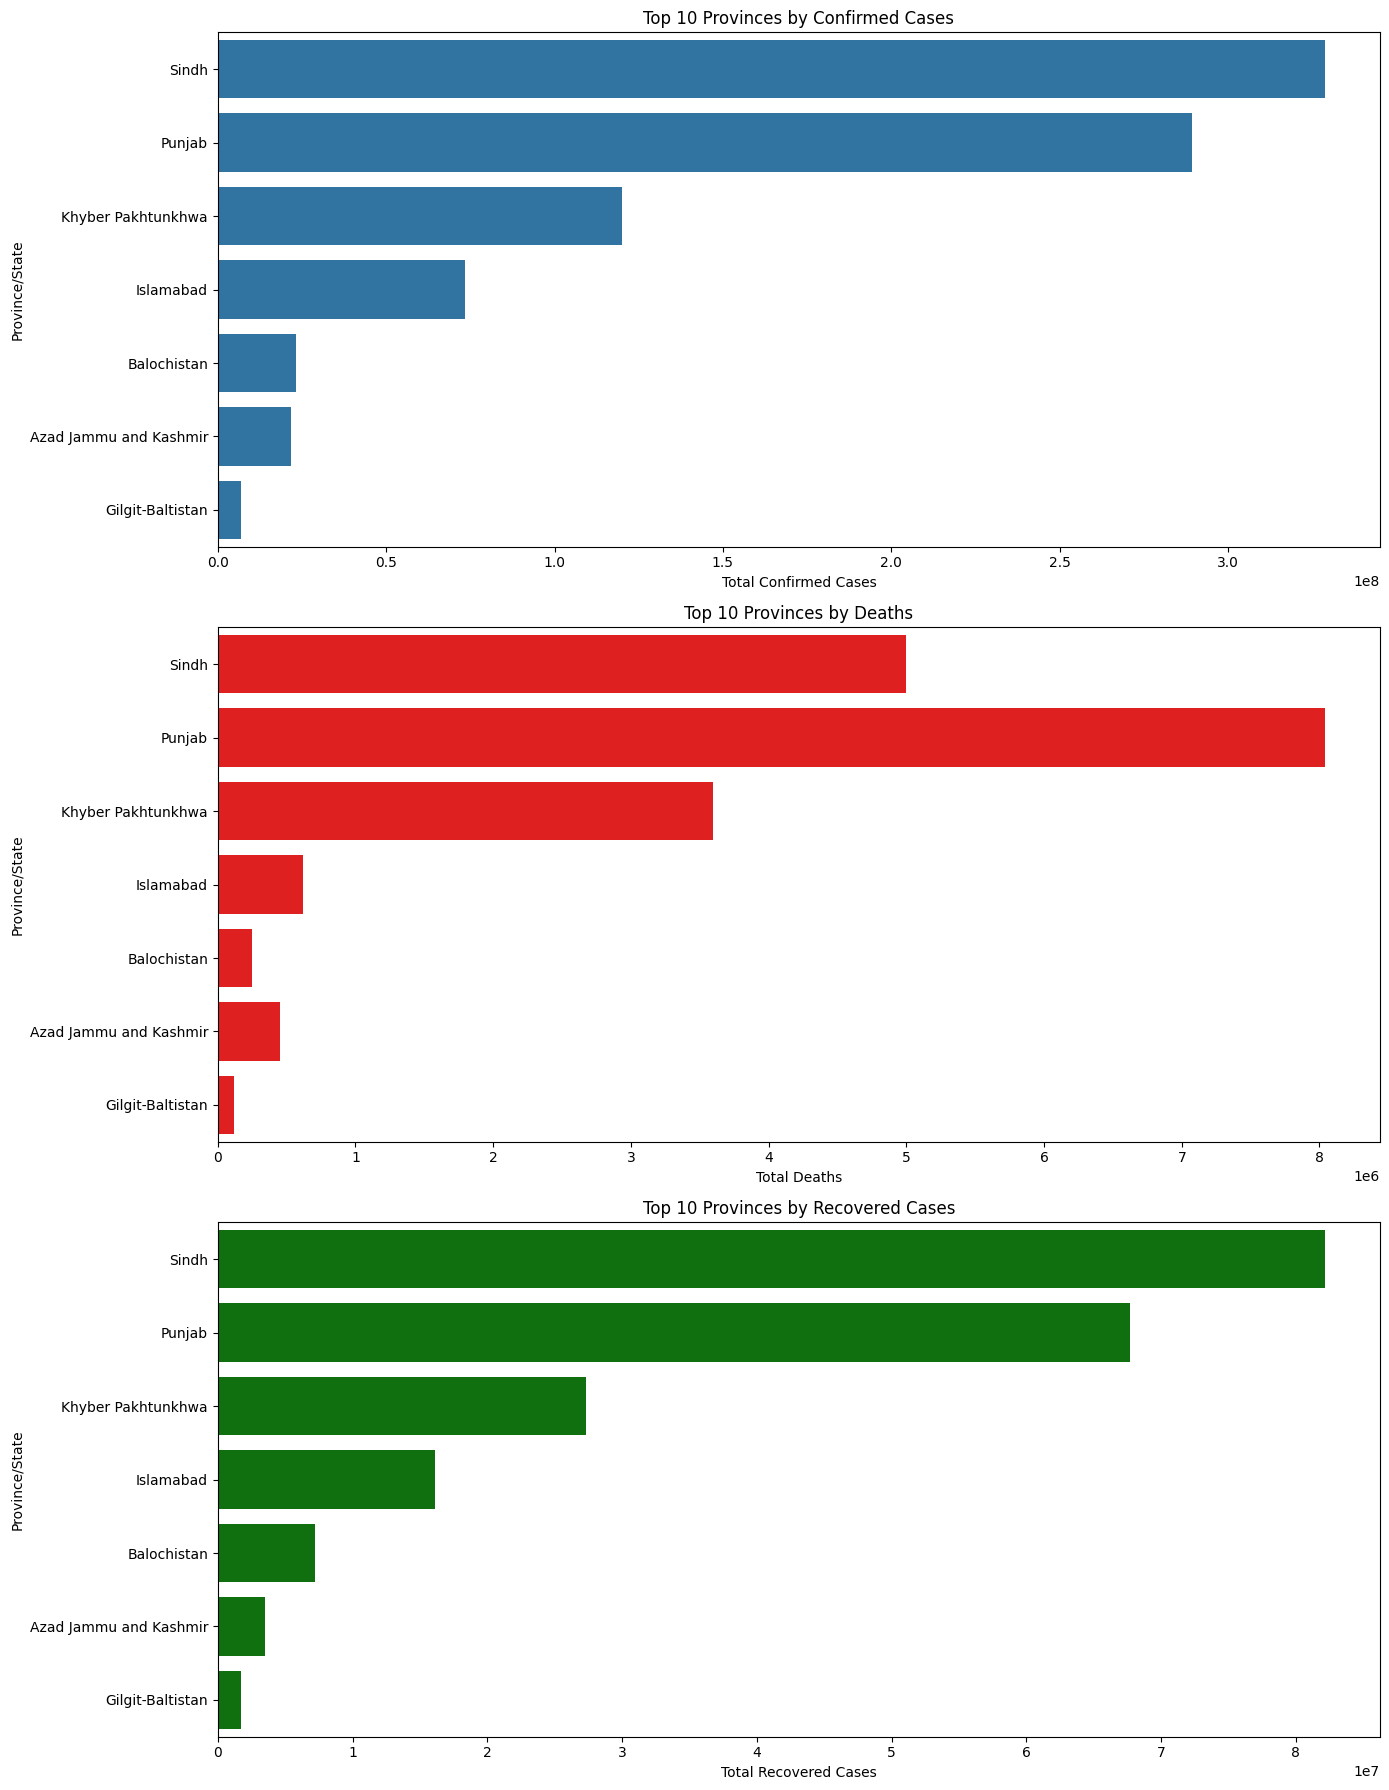

In [122]:
# Select only numeric columns for sum operation
numeric_cols = province_data.select_dtypes(include=['number']).columns

# Include 'Province_State' for grouping, then perform sum operation on numeric columns only
province_totals = province_data[['Province_State'] + list(numeric_cols)].groupby('Province_State').sum()
# Taking top 10 provinces by total confirmed cases
top_provinces = province_totals.nlargest(10, 'Confirmed')

# Plotting top 10 provinces by confirmed cases, deaths, and recoveries
plt.figure(figsize=(14, 18))

plt.subplot(3, 1, 1)
sns.barplot(x=top_provinces['Confirmed'], y=top_provinces.index)
plt.title('Top 10 Provinces by Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Province/State')

plt.subplot(3, 1, 2)
sns.barplot(x=top_provinces['Deaths'], y=top_provinces.index, color='red')
plt.title('Top 10 Provinces by Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Province/State')

plt.subplot(3, 1, 3)
sns.barplot(x=top_provinces['Recovered'], y=top_provinces.index, color='green')
plt.title('Top 10 Provinces by Recovered Cases')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Province/State')

plt.tight_layout()
plt.show()


## Why ARIMA and ARIMAX Models?


The ARIMA (Autoregressive Integrated Moving Average) model was chosen due to its ability to model time series data that show patterns and predict future points in the series. Its components (AR, I, MA) allow us to address different types of autocorrelation within the dataset, making it a versatile choice for our analysis.

The ARIMAX model, an extension of ARIMA, incorporates exogenous variables, allowing us to examine the impact of external factors (such as vaccination rates and policy changes) on COVID-19 case numbers. This model helps us understand not just the time series pattern but also the effect of interventions, crucial for evaluating policy effectiveness.

## Model Parameters Rationale


For our ARIMA model, parameters were selected based on the AIC (Akaike Information Criterion) after performing a grid search. The goal was to find a balance between model complexity and fit to avoid overfitting while capturing the underlying trends in the data effectively.

In the case of ARIMAX, the selection of exogenous variables was informed by prior research and the availability of relevant data. Variables considered include vaccination rates, lockdown intensity, and public health guidelines implementation, aiming to capture the multifaceted approach to pandemic management.

## Auto ARIMA Model

In [123]:
# Finding the best ARIMA model
data = pd.read_csv('main_data.csv')

auto_model = auto_arima(data['ConfirmedCases'], start_p=0, start_q=0, max_p=5, max_q=5,
                        seasonal=False, stepwise=True, suppress_warnings=True, D=0, d=1, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19411.017, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17586.188, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18565.732, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19996.731, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17441.658, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=17246.660, Time=0.74 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=17223.153, Time=0.52 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=17211.045, Time=0.52 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=17212.880, Time=1.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=17215.300, Time=2.15 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0] intercept
Total fit time: 6.714 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:             

##ARIMA Model

In [124]:
# Fitting an ARIMA model
data = pd.read_csv('main_data.csv')
model_arima = ARIMA(data['ConfirmedCases'], order=(5,1,0))
results_arima = model_arima.fit()
print(results_arima.summary())


                               SARIMAX Results                                
Dep. Variable:         ConfirmedCases   No. Observations:                 1096
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8599.829
Date:                Thu, 04 Apr 2024   AIC                          17211.657
Time:                        00:30:48   BIC                          17241.648
Sample:                             0   HQIC                         17223.006
                               - 1096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3622      0.012     31.098      0.000       0.339       0.385
ar.L2          0.0640      0.013      5.034      0.000       0.039       0.089
ar.L3          0.3307      0.016     20.144      0.0

##ARIMAX Model

Before running the ARIMAX model, ensure you have the correct columns for your exogenous variables.

In [125]:
# List of intervention columns as exogenous variables (adjust names as necessary)
intervention_columns = ['C6M_Stay at home requirements',
    'C4M_Restrictions on gatherings',
    'C5M_Close public transport',
    'E1_Income support',
    'H6M_Facial Coverings',
    'V3_Vaccine Financial Support (summary)',
    'V4_Mandatory Vaccination (summary)',
    'C2M_Workplace closing',
    'C3M_Cancel public events',
    'C7M_Restrictions on internal movement',
    'H2_Testing policy',
    'H3_Contact tracing',
    'H7_Vaccination policy',
    'H8M_Protection of elderly people',
    'PopulationVaccinated',
    'StringencyIndex_Average',
    'GovernmentResponseIndex_Average',
    'ContainmentHealthIndex_Average',
    'EconomicSupportIndex',]
exog_data = data[intervention_columns].fillna(0)

model_arimax = SARIMAX(data['ConfirmedCases'], order=(5,1,0), exog=exog_data)
results_arimax = model_arimax.fit()
print(results_arimax.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:         ConfirmedCases   No. Observations:                 1096
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -8709.124
Date:                Thu, 04 Apr 2024   AIC                          17468.248
Time:                        00:31:05   BIC                          17593.211
Sample:                             0   HQIC                         17515.533
                               - 1096                                         
Covariance Type:                  opg                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
C6M_Stay at home requirements           -829.1829    259.963     -3.190      0.001   -1338.701    -319.665
C4M_Restrictions on gatherings          -489.53

# Results and Discussion

## Government Policy Results

**Introduction:**
This analysis aims to interpret the dynamics of policy intensities in Pakistan over time to evaluate the effectiveness of various strategies implemented by the government in response to the COVID-19 pandemic. The policies are broadly categorized into containment and closure policies, economic policies, health system policies, and vaccination policies.

**Methodology:**
We use heatmaps to visualize the intensity of each policy, represented by a gradient color scale where the intensity of the color correlates with the level of policy enforcement.

**Containment and Closure Policy Analysis:**
The heatmap shows a dynamic approach to containment and closure policies, including school and workplace closures, canceling public events, restrictions on gatherings, public transport, and internal movement, along with international travel controls. These policies experienced varying levels of intensity, with some such as restrictions on gatherings and public transport remaining consistently high. In contrast, others, like international travel controls, show fluctuating intensities, possibly reflecting the government's strategy to align with global trends and disease prevalence rates.

**Economic Policy Analysis:**
Economic support measures show a consistent pattern, with debt/contract relief being a significant and constant support provided by the government throughout the pandemic. Income support initiatives also display a notable presence but with varied intensity, suggesting a targeted approach in disbursing economic aid in response to fluctuating economic conditions.

**Health System Policy Analysis:**
Health system policies such as public information campaigns and testing policies were maintained at high intensity throughout the period. Contact tracing and facial coverings display a lower intensity initially, followed by an increase, likely indicating the scaling up of health system responses as the pandemic progressed.

**Vaccination Policy Analysis:**
Vaccination policies saw gradual intensification, correlating with vaccine availability and distribution strategies. Frontline healthcare workers were prioritized initially, followed by an expansion to other vulnerable groups. Vaccine education and prioritization programs show variations in intensity, suggesting adaptive strategies to enhance vaccine uptake as circumstances evolved.

**Discussion:**
The varying intensities of these policies over time suggest a responsive and adaptive government approach, modulating policy enforcement levels in line with pandemic waves and societal needs. While containment and closure policies remained a critical component of the initial response, economic and health system policies were scaled accordingly to support affected populations and bolster the healthcare response. The ramping up of vaccination policies aligns with global trends in moving towards a vaccinated society as a pathway out of the pandemic.

## Provinces Analysis Results

**Introduction:**
The provincial analysis of COVID-19 data in Pakistan presents a comparative look at the spread and management of the pandemic across different regions. It focuses on three key indicators: confirmed cases, deaths, and recoveries, to understand the relative impact of the virus and the effectiveness of response strategies.

**Methodology:**
Bar charts represent the total number of confirmed cases, deaths, and recoveries for the top provinces in Pakistan. These visualizations allow us to quickly discern which provinces have been most affected by COVID-19 and may, therefore, require more focused attention in terms of resources and policy implementation.

**Confirmed Cases Analysis:**
The first bar chart illustrates that Sindh and Punjab are the most affected provinces, with the highest number of confirmed COVID-19 cases. This could be attributed to their higher population densities and the presence of major urban centers where transmission rates are generally higher.

**Deaths Analysis:**
The second bar chart concerning COVID-19-related deaths again shows Sindh and Punjab at the forefront. It is critical to note that while these provinces have the highest numbers, this does not necessarily reflect a higher death rate as the figures are absolute and do not account for population size or the number of cases.

**Recovered Cases Analysis:**
In the third visualization depicting recoveries, the trend remains consistent with Sindh and Punjab leading in the number of recovered cases. This correlates with the higher number of confirmed cases and suggests a capacity for effective medical response in terms of treating COVID-19 patients.

**Discussion:**
The disparities among provinces in confirmed cases, deaths, and recoveries may reflect differences in testing rates, healthcare infrastructure, and policy enforcement efficacy. Sindh and Punjab, being the most populous regions with major economic hubs, have faced the brunt of the pandemic, underscoring the need for targeted policy interventions and resource allocation.

**Conclusion:**
The provincial analysis underlines the varied impact of COVID-19 across Pakistan, with certain regions requiring more intensive health measures and economic support. The data calls for a nuanced approach to pandemic management, taking into account the unique challenges faced by each province. Going forward, these insights can guide more localized and effective responses to future public health crises.

##Auto ARIMA Results

**Model Selection:** The Auto ARIMA process identified the ARIMA(5,1,0) model as the best fit, based on the lowest AIC (Akaike Information Criterion) value of 17211.045. This indicates a preference for a model with 5 autoregressive terms, 1 differencing step, and no moving average component, which is a relatively complex model suggesting that the number of cases today depends on the cases in the previous five days after accounting for the trend.

**Model Coefficients:** The coefficients of the AR terms are significant, as indicated by the P-values close to 0. This suggests a strong relationship between past values and future values of confirmed cases.

**Statistical Significance:** The Ljung-Box test result (Prob(Q): 0.93) and the Jarque-Bera test result (Prob(JB): 0.00) imply that the residuals are uncorrelated and the distribution has significant skew and kurtosis, indicating that the model captures the correlation structure of the series well, but the distribution of the residuals deviates from normality.

## ARIMA Results

**Model Performance:** The fitted ARIMA(5,1,0) model achieved a similar AIC value of 17211.657, closely aligning with the Auto ARIMA result, indicating consistent model selection between manual specification and automated processes.

**Coefficient Analysis:** Similar to the Auto ARIMA model, all AR terms are significant, emphasizing the importance of the last five days' data in predicting future case numbers.

**Statistical Tests:** The Ljung-Box and Jarque-Bera test results show patterns akin to the Auto ARIMA model, suggesting good model fit but with non-normal residual distribution.

##ARIMAX Results

**Model Insights:** The ARIMAX model incorporates exogenous variables, revealing the impact of specific policies and factors on confirmed cases. The model achieved an AIC of 17468.248, which is higher than the ARIMA models, likely due to the added complexity of exogenous variables.

**Significant Interventions:** Key policies such as mandatory vaccination (P<0.000, coef: 1619.7945) and contact tracing (P<0.018, coef: 17400) have significantly positive coefficients, indicating a strong association with increased case numbers. This could be due to these measures being implemented in response to rising cases, rather than causing an increase in cases.

**Vaccination Impact:** The positive coefficient for 'PopulationVaccinated' (coef: 378.6247) with a significant P-value (P<0.000) suggests a beneficial impact of vaccination on controlling the spread, as expected.

**Policy Efficacy:** The significant negative coefficients for some interventions (e.g., stay-at-home requirements, restrictions on gatherings) indicate their effectiveness in reducing confirmed cases, aligning with expectations that such measures would lower transmission rates.

# Conclusion

The comprehensive analysis encompassing government policies, provincial impacts, and ARIMA modeling has provided critical insights into Pakistan’s management of the COVID-19 crisis.

From the outset, the government has adopted a dynamic approach to policy enforcement, with containment, closure, and economic measures adapting to the changing tides of the pandemic. Intense health system initiatives including public information campaigns, and a gradual ramp-up of vaccination policies, have aligned with global public health recommendations. Particularly notable is the significant positive impact of vaccination on controlling the spread of the virus, which is evident from the ARIMAX model analysis, emphasizing the crucial role of vaccinations in pandemic containment strategies.

Provincially, Sindh and Punjab emerged as the most affected regions, indicating a correlation between population density and COVID-19 prevalence. These findings highlight the importance of nuanced, region-specific approaches to health crises, ensuring resource allocation and policy implementation that account for the diverse challenges faced by different provinces.

ARIMA and ARIMAX models, through their statistical rigor, have underlined the predictive power of past COVID-19 case data, while also revealing the effectiveness of certain interventions. The presence of significant skew and kurtosis in the distribution of residuals suggests an area for model improvement, possibly through the exploration of alternative distributions or transformations to better capture the underlying data generation process.

The positive coefficients for interventions such as mandatory vaccination and contact tracing in the ARIMAX model should be interpreted with caution; they likely reflect a reactive intensification of these measures in response to surging cases rather than a causal relationship. Nonetheless, the negative :coefficients for stay-at-home requirements and restrictions on gatherings confirm the expected outcome of these interventions in reducing transmission.

In conclusion, Pakistan’s multifaceted and adaptable response to the COVID-19 pandemic has shown varying degrees of effectiveness, with the intensification of vaccination efforts marking a particularly successful strategy. The analytical results point towards the significant role of targeted government policies in controlling the pandemic, but also to the potential benefits of refining these strategies over time based on localized data and trends. As the world moves into different phases of managing COVID-19, Pakistan's experience serves as a testament to the power of informed, data-driven policy-making in public health emergencies.

# References

### Data Sources
- COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University: [CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19)
- Official COVID-19 statistics from the Government of Pakistan: [COVID-19 Government of Pakistan](http://covid.gov.pk/stats/pakistan)
- Oxford COVID-19 Government Response Tracker: [OxCGRT/covid-policy-dataset](https://github.com/OxCGRT/covid-policy-dataset)

### Python Packages
- `pandas`: Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) ([Link to Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html))
- `numpy`: Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). ([Link to NumPy Documentation](https://numpy.org/doc/stable/))
- `matplotlib`: John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), ([Link to Matplotlib Documentation](https://matplotlib.org/stable/users/index.html))
- `seaborn`: Michael Waskom. seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, (2021) ([Link to Seaborn Documentation](https://seaborn.pydata.org/))
- `statsmodels`: Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010. ([Link to Statsmodels Documentation](https://www.statsmodels.org/stable/index.html))
- `scikit-learn`: Pedregosa et al., Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830, (2011). ([Link to Scikit-Learn Documentation](https://scikit-learn.org/stable/))
- `pmdarima`: Taylor, S.J. & Letham, B. (2018). Forecasting at Scale. The American Statistician, 72(1), 37-45. ([Link to pmdarima Documentation](https://www.alkaline-ml.com/pmdarima/))